Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix, mean_absolute_percentage_error

Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/train.csv')

In [ ]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
car_dataset['Mileage']=car_dataset['Mileage'].str.replace('km','')

In [ ]:
car_dataset['Mileage']=car_dataset['Mileage'].astype(int)

In [ ]:
car_dataset['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64

In [ ]:
# checking the number of rows and columns
car_dataset.shape

(19237, 18)

In [ ]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
car_dataset.rename(columns={'Fuel type':'Fuel_Type'},inplace = True)

In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())


Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel_Type, dtype: int64


In [ ]:
car_dataset.rename(columns={'Gear box type':'Gear_Box'},inplace = True)

In [ ]:
print(car_dataset.Gear_Box.value_counts())

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear_Box, dtype: int64


In [ ]:
car_dataset.rename(columns={'Manufacturer':'Brand'},inplace = True)

In [ ]:
print(car_dataset.Brand.value_counts())

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Brand, Length: 65, dtype: int64


In [ ]:
car_dataset.rename(columns={'Mileage':'Mileage'},inplace = True)

In [ ]:
print(car_dataset.Mileage.value_counts())

0         721
200000    183
150000    161
160000    120
100000    119
         ... 
63083       1
28750       1
25077       1
77452       1
186923      1
Name: Mileage, Length: 7687, dtype: int64


In [ ]:
print(car_dataset.Category.value_counts())

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64


In [ ]:
car_dataset.rename(columns={'Leather interior':'leather_interior'},inplace=True)

In [ ]:
print(car_dataset.leather_interior.value_counts())

Yes    13954
No      5283
Name: leather_interior, dtype: int64


Encoding the Categorical Data

In [ ]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'Hybrid':3,'LPG':4,'Plug-in Hybrid':5,'Hydrogen':6}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Gear_Box':{'Automatic':0,'Tiptronic':1,'Manual':2,'Variator':3}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Category':{'Sedan':0,'Jeep':1,'Hatchback':2,'Minivan':3,'Coupe':4,'Universal':5,'Microbus':6,'Goods wagon':7,'Pickup':8,'Cabriolet':9,'Limousine':10}},inplace=True)
car_dataset.replace({'leather_interior':{'Yes':0,'No':1}},inplace=True)

In [ ]:
car_dataset.head()

,ID,Price,Levy,Brand,Model,Prod. year,Category,leather_interior,Fuel_Type,Engine volume,Mileage,Cylinders,Gear_Box,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,1,0,3,3.5,186005,6.0,0,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,1,1,0,3,192000,6.0,1,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,2,1,0,1.3,200000,4.0,3,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,1,0,3,2.5,168966,4.0,0,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,2,0,0,1.3,91901,4.0,0,Front,04-May,Left wheel,Silver,4


Splitting the data and Target

In [ ]:
X = car_dataset.drop(['ID','Color','Brand','Levy','Model','Engine volume','Cylinders','Drive wheels','Doors','Wheel','Airbags','Price'],axis=1)
Y = car_dataset['Price']

In [ ]:
print(X)

       Prod. year  Category  leather_interior  Fuel_Type  Mileage  Gear_Box
0            2010         1                 0          3   186005         0
1            2011         1                 1          0   192000         1
2            2006         2                 1          0   200000         3
3            2011         1                 0          3   168966         0
4            2014         2                 0          0    91901         0
...           ...       ...               ...        ...      ...       ...
19232        1999         4                 0          2   300000         2
19233        2011         0                 0          0   161600         1
19234        2010         1                 0          1   116365         0
19235        2007         1                 0          1    51258         0
19236        2012         0                 0          3   186923         0

[19237 rows x 6 columns]


In [ ]:
print(Y)

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64


Splitting Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training

1. Linear Regression

In [ ]:
# loading the linear regression model
linear = LinearRegression()

In [ ]:
linear.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on Training data
prediction = linear.predict(X_train)

In [ ]:
# R squared Error
error = metrics.r2_score(Y_train,prediction)
print("R squared Error : ", error)

R squared Error :  0.12421213754188598


Visualize the actual prices and Predicted prices

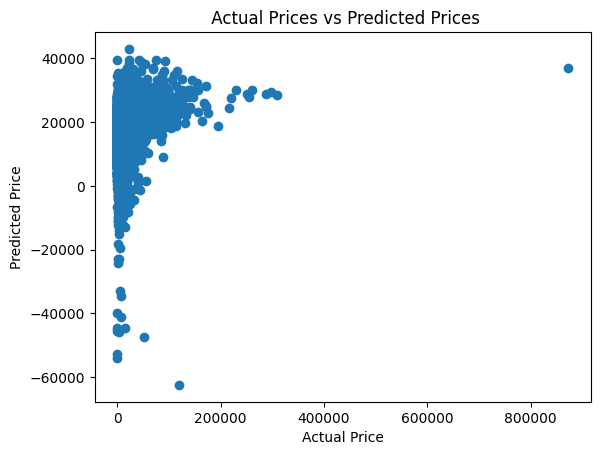

In [ ]:
plt.scatter(Y_train,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
testprediction = linear.predict(X_test)

In [ ]:
# R squared Error
error = metrics.r2_score(Y_test, testprediction)
print("R squared Error : ", error)

R squared Error :  -0.00019053732752638552


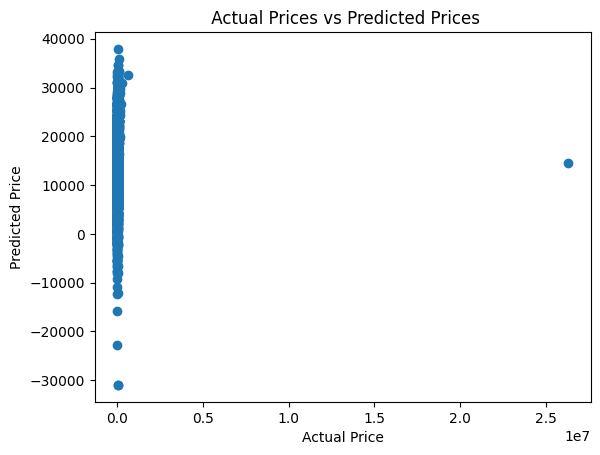

In [ ]:
plt.scatter(Y_test,testprediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#accuracy=accuracy_score(Y_test,testprediction)*100
er = mean_absolute_percentage_error(testprediction ,Y_test)
print(100-er)

98.53865567765071


2. Lasso Regression

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.12421210637344016


Visualize the actual prices and Predicted prices

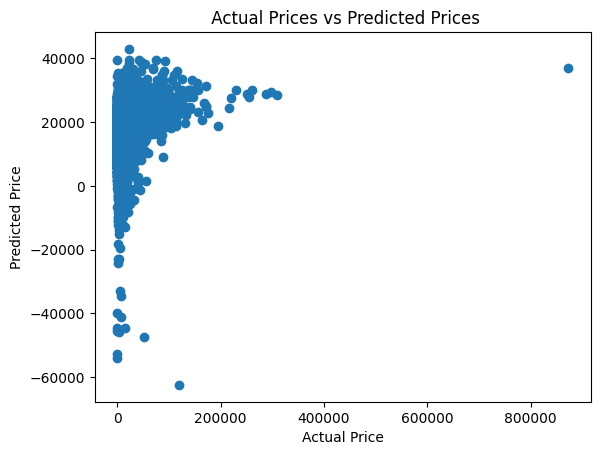

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
decision=DecisionTreeRegressor()

In [ ]:
decision.fit(X_train,Y_train)

In [ ]:
training_data_prediction = decision.predict(X_train)

In [ ]:
error=metrics.r2_score(Y_train,training_data_prediction)
print("error score is :",error)

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
testprediction=decision.predict(X_test)

In [ ]:
error=metrics.r2_score(Y_test,testprediction)
print("error is :",error)

In [ ]:
plt.scatter(Y_test, testprediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()